In [1]:
### Note
# LDA part was inherited from this article https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [3]:

import pandas as pd
from matplotlib import pyplot as plt

from exploration.comments_exploration import cloud

comments_df = pd.read_csv('./temp_data/pp_utterances.csv')

len(comments_df)

262656

In [4]:
comments_df.head(3)

,id,issueid,created,author,actionbody,utr_seq,is_private,comment_seq,author_role,pp_actionbody,words_count,pp_words_count
0,211718001.0,1004285.0,2022-01-01 18:54:38+00:00,ae.edw.03,greetings,0,0,0,reporter,ph_com_protocol,1,1
1,211718001.0,1004285.0,2022-01-01 18:54:38+00:00,ae.edw.03,we do not know why if the kube certificates we...,1,0,0,reporter,know kube certif renew,11,4
2,211718001.0,1004285.0,2022-01-01 18:54:38+00:00,ae.edw.03,it is now again showing expired on 26-11-2021....,2,0,0,reporter,show expir 26112021 stage,11,4


In [5]:
comments_df[['issueid', 'author_role']].groupby('author_role').count()\
.reset_index()\
.rename(columns={'issueid':'Count','author_role':'Author Role'})\
.transpose()

,0,1,2
Author Role,assignee,others,reporter
Count,102130,110828,49698


In [6]:
comments_df = comments_df[~pd.isna(comments_df['pp_actionbody'])]
len(comments_df)

259317

In [7]:
comments_df = comments_df[~((comments_df['author'].isin(['admin','u003']))
                        & (comments_df['comment_seq'] < 3)
                        & (comments_df['author_role'] == 'others'))]

comments_df = comments_df[~pd.isna(comments_df['pp_actionbody'])]

In [8]:
comments_df[['issueid', 'author_role']].groupby('author_role').count()\
.reset_index()\
.rename(columns={'issueid':'Count','author_role':'Author Role'})\
.transpose()

,0,1,2
Author Role,assignee,others,reporter
Count,101729,48240,49412


In [9]:
# na_actionbody_df = comments_df[pd.isna(comments_df['pp_actionbody']) & ~pd.isna(comments_df['actionbody'])]
# print(len(na_actionbody_df))
# na_actionbody_df.to_csv('./temp_data/na_utterances.csv')

In [10]:
# comments_df = comments_df[~comments_df['author'].isin(['admin','u003'])]
cloud_df = comments_df[['author_role','pp_actionbody']]
cloud_df = cloud_df.drop_duplicates()
len(cloud_df)

60228

## word cloud

/opt/conda/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


(58436, 60228)

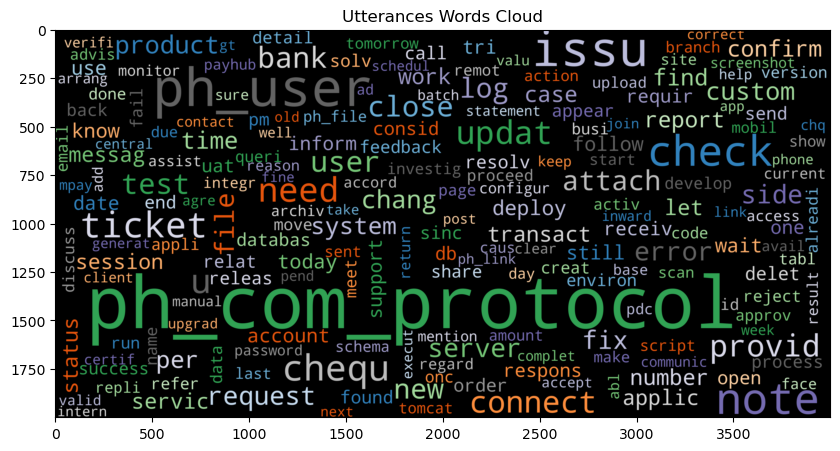

In [11]:
max_words = 200

fig = plt.figure(figsize=(10,6))
ax1 = (fig.add_subplot(111))
ax1.set_title('Utterances Words Cloud')
cloud(utterances_df=cloud_df, ax=ax1, max_words = max_words,width=4000)

/opt/conda/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/opt/conda/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/opt/conda/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


(24802, 24802)

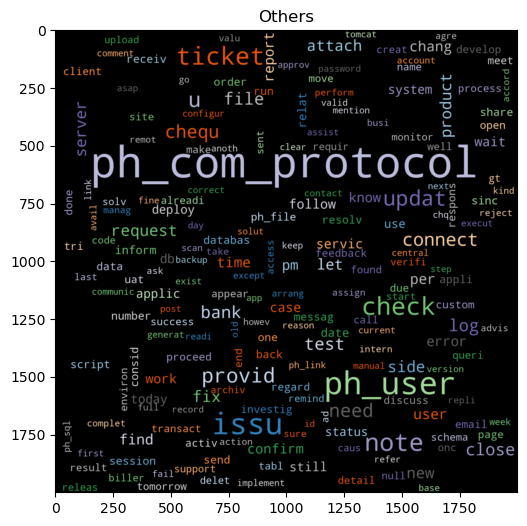

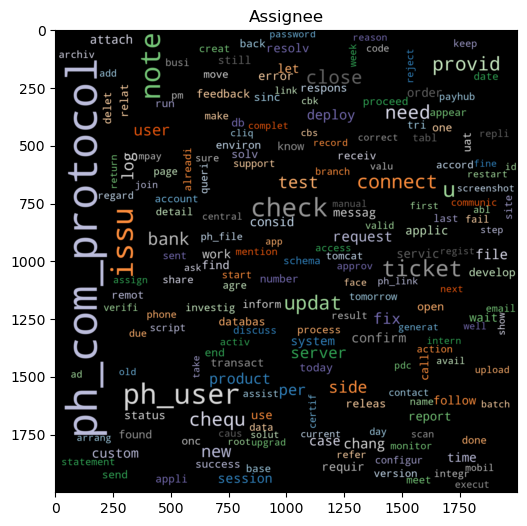

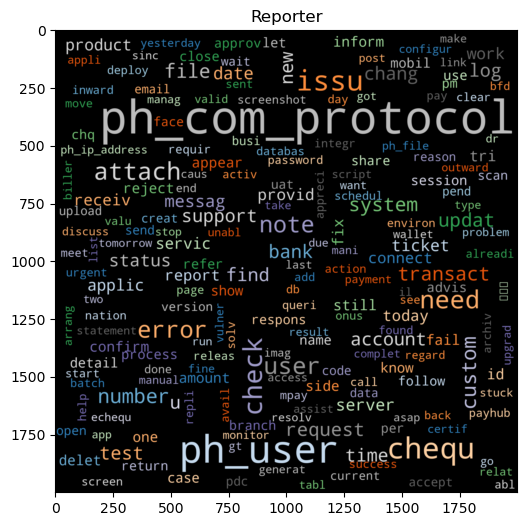

In [12]:
others_df = cloud_df[cloud_df['author_role'] == 'others']
assignee_df = cloud_df[cloud_df['author_role'] == 'assignee']
reporter_df = cloud_df[cloud_df['author_role'] == 'reporter']

fig = plt.figure(figsize=(6, 6))
ax1 = (fig.add_subplot(111))
ax1.set_title('Others')
cloud(utterances_df=others_df, ax=ax1, max_words = max_words)

fig = plt.figure(figsize=(6, 6))
ax2 = (fig.add_subplot(111))
ax2.set_title('Assignee')
cloud(utterances_df=assignee_df, ax=ax2, max_words = max_words)

fig = plt.figure(figsize=(6, 6))
ax3 = (fig.add_subplot(111))
ax3.set_title('Reporter')
cloud(utterances_df=reporter_df, ax=ax3, max_words = max_words)

### LDA

In [13]:
# from exploration.comments_exploration import utterances_lda
# import pyLDAvis

# # Visualize the topics
# pyLDAvis.enable_notebook()

# lda_model = utterances_lda(comments_df, num_topics=8, random_state=42)

# lda_model.lda_visualize

In [14]:
# lda_model = utterances_lda(comments_df[comments_df['author_role'] == 'reporter'], num_topics=7, random_state=42)

# lda_model.lda_visualize

In [15]:
# lda_model = utterances_lda(comments_df[comments_df['author_role'] == 'assignee'], num_topics=6,random_state=42)

# lda_model.lda_visualize

In [16]:
# lda_model = utterances_lda(comments_df[comments_df['author_role'] == 'others'], num_topics=8,random_state=42)

# lda_model.lda_visualize